# Text Mining Project

Text Mining project


In [13]:
pip install langdetect


Note: you may need to restart the kernel to use updated packages.


In [14]:



import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [80]:


train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")



## Data exploration

In [81]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [82]:
train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [83]:
test.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [84]:
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [85]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)


train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


in DATASETS the index repeats, which may indicate that refers to a specific house. We'll change this column to house ID


In [86]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)



In [87]:
train

,houseID,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [88]:
train_reviews

,houseID,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
...,...,...
361276,6248,The location was perfect. The apartment was ve...
361277,6248,Ana's place is exactly as described and even b...
361278,6248,A Ana foi muito atenciosa e preocupou se com o...
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...


In [89]:
train = train.copy()
train_reviews = train_reviews.copy()
test = test.copy()
test_reviews = test_reviews.copy()

In [90]:
train.duplicated().sum()

0

In [91]:
train_reviews.duplicated().sum()

142

In [93]:
duplicates_train_reviews =train_reviews[train_reviews.duplicated(keep=False)]
print(duplicates_train_reviews)


        houseID                                           comments
3248         61                                         Excelente!
3254         61                                         Excelente!
4225         70                              Everything was great!
4263         70                              Everything was great!
6584        144  Sofia is an incredible host, and made us feel ...
...         ...                                                ...
353703     6106                                              Super
358567     6182                                    Great location!
358568     6182                                    Great location!
359054     6202                                        Great place
359076     6202                                        Great place

[273 rows x 2 columns]


In [95]:
test.duplicated().sum()

0

In [36]:
test_reviews.duplicated().sum()

438

In [96]:
duplicates_test_reviews =test_reviews[test_reviews.duplicated(keep=False)]
print(duplicates_test_reviews)

       houseID                                           comments
1622        42                                        Great place
1645        42                                        Great place
8862       155                                               Good
8884       155                                               Good
11302      178                                       Great place!
11416      178                                    Great location!
11445      178                                    Great location!
11454      178                                       Great place!
11631      179                                                  .
11829      179                                                  .
16030      246  We had a nice stay and friendly contacts. Than...
16031      246  We had a nice stay and friendly contacts. Than...
16685      255                                                  .
16783      255                                                  .
18846     

In [97]:
train.isna().sum()


houseID        0
description    0
host_about     0
unlisted       0
dtype: int64

In [98]:
train_reviews.isna().sum()

houseID     0
comments    2
dtype: int64

In [124]:
train_reviews.dropna(subset=['comments'], inplace=True)



In [125]:
test.isna().sum()

houseID        0
description    0
host_about     0
dtype: int64

In [126]:
test_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [127]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
houseID,6248.0,3124.500000,1803.786573,1.0,1562.75,3124.5,4686.25,6248.0
unlisted,6248.0,0.273367,0.445724,0.0,0.00,0.0,1.00,1.0


In [128]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

train["language"] = train["description"].apply(detect_language)
train.head()

,houseID,description,host_about,unlisted,language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr


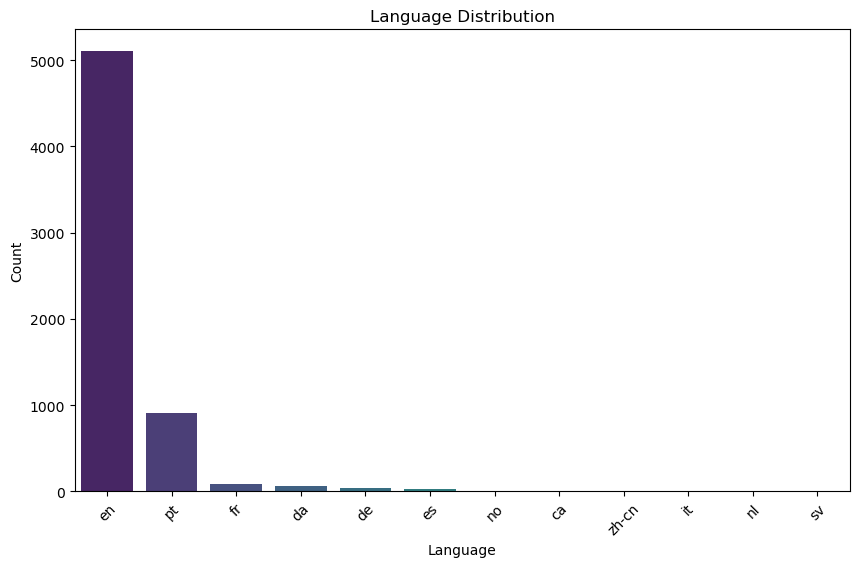

In [129]:
language_counts = train["language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [130]:
train["language"].unique()

array(['en', 'pt', 'fr', 'es', 'de', 'da', 'no', 'sv', 'it', 'ca',
       'zh-cn', 'nl'], dtype=object)

'en': English 
'pt': Portuguese
'fr': French
'es': Spanish
'de': German
'da': Danish
'no': Norwegian
'sv': Swedish
'it': Italian
'ca': Catalan
'zh-cn': Chinese (Simplified)
'nl': Dutch

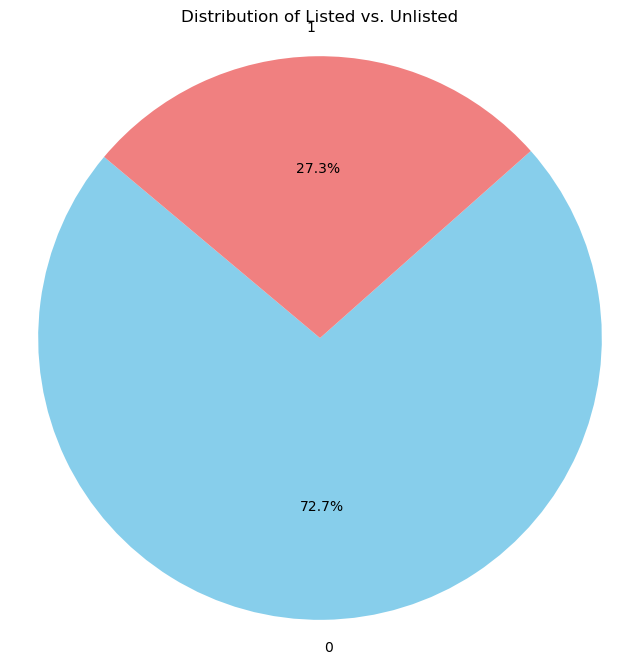

In [131]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

In [132]:
def find_unique_matches(data, column):
    # Convert column data to string type (handle NaN values gracefully)
    column_data = data[column].astype(str)
    
    # Concatenate all comments into a single string
    all_comments = ' '.join(column_data)
    
    # Define a regular expression pattern to match small words and punctuation marks
    pattern = r'\b\w{1,2}\b|[^\w\s]'
    
    # Find all matches of the pattern in the concatenated string
    matches = re.findall(pattern, all_comments)
    
    # Return unique matches using a set comprehension
    return set(matches)


unique_matches = find_unique_matches(train_reviews, 'comments')

# Print the unique small words and punctuation marks
print("Unique small words and punctuation marks:")
print(list(unique_matches))


Unique small words and punctuation marks:
['by', 'Ay', '환상', 'GT', '둘다', '🌈', '따만', '및', 'D', '1d', '전체', '1A', 'SN', '걱정', '잠궈', '다소', '층을', '🥰', '멀면', '뒤', '해', 'MA', '🎷', '제가', '👠', '넣어', '12', '9欧', '욕조', '싫어', 'KO', '뿔꽃', '⛔', '빵읺', 'バー', '외출', '손님', '장', 'že', '가진', '쬐금', '숙쏘', '풀고', '약한', '牛奶', '厨房', '근처', '조곰', '2D', 'Bé', '짧지', '끝', 'ak', 'Tu', 'Tt', 'pq', 'oú', '근데', 'nB', '놀고', 'ID', '4h', 'まず', 'wo', 'Pi', 'ды', 'жд', 'ws', '날끈', 'no', '불', 'LR', '～', '이뻐', '보지', 'LV', '👌', '간', '🫧', 'ㅎㅎ', 'им', 'ás', '빵들', 'Не', 'ME', '1e', '물과', '나갈', 'zo', '예약', '1차', '여기', 'OH', 'VC', 'lf', '찰나', '수법', '구럼', 'sn', '쬬쿪', 'Mí', 'Ut', '행', 'ua', 'ee', '병도', '락이', '9', '버뜨', '얼마', 'x3', '열릴', '갃장', '이용', '줌', '🍰', '착한', '물론', '내외', '괜히', '3분', 'GG', '연락', 'bn', '사갈', '1인', '😓', '3y', '인생', '수건', '슬슬', '동눼', '요', '대신', '쬭꿈', '물또', '같이', '💓', 'rá', '좁을', '舒服', '평졈', '쉽지', '이나', '哈哈', '술', 'WI', '든다', 'е', '온', '廚房', '치약', 'JC', '부디', '😴', 'ただ', 'le', '날이', '법과', '의', '얕은', '마리', '29', 'u', 'd

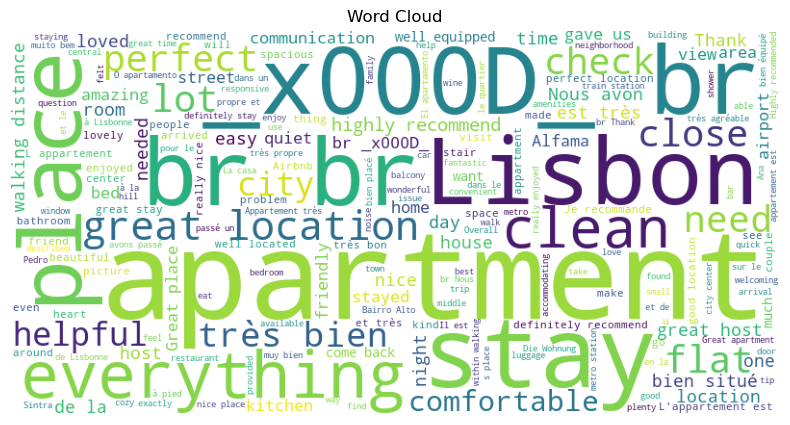

In [133]:
from wordcloud import WordCloud

# Joining all the reviews into a single string
all_reviews = ' '.join(train_reviews['comments'])
    
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud')
plt.show()

In [134]:
merged_data = pd.merge(train, train_reviews,  on='houseID', how='left')



In [135]:
merged_data

,houseID,description,host_about,unlisted,language,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,this is a very cozy and comfortable house to s...
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,good<br/>
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"My first hostel experience, and all I have to ..."
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,Das Hostel war neu und deshalb funktionierte a...
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"It was fine for a dorm, but I think for the pe..."
...,...,...,...,...,...,...
363277,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,The location was perfect. The apartment was ve...
363278,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,Ana's place is exactly as described and even b...
363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,A Ana foi muito atenciosa e preocupou se com o...
363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,No wifi nor answer. <br/>The wifi can’t be con...


In [136]:
merged_data.isna().sum()

houseID           0
description       0
host_about        0
unlisted          0
language          0
comments       2003
dtype: int64